# Задание
Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф" и сохранить результаты в pandas dataframe. Либо загрузите из pickle-файла df_nashdomrf.pkl, если не получается скачать.<br>
-- Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:<br>
-- Привести колонки датафрейма к одному типу данных. <br>
-- Проверить индекс, чтобы он соответствовал порядку строк. <br>
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки (например, заменить медианой, 0, -99999, удалить наблюдения с пропусками).

Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.<br>
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. <br>
-- Рассчитать объемы вводимого жилья по регионам и по годам.<br> 
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах. <br>
-- Визуализировать разброс, связь и распределение этих показателей по регионам. <br>
-- Сделать выводы по каждому из расчетов и графиков

In [12]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

Возьмем из ДЗ1 готовый d-frame:

In [115]:
df = pd.read_excel('домрф.xlsx', dtype=str)
df = df.sort_values(by=['objPublDt']).reset_index()
df = df.drop(columns = ['Unnamed: 0', 'index'])
df.sample()

,hobjId,objId,rpdRegionCd,objAddr,objFloorMin,objFloorMax,objElemLivingCnt,objReady100PercDt,objSquareLiving,objCompensFundFlg,...,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroup,developer.devInn,objCommercNm,complexShortName,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
9321,134385,53715,44,город Кострома,3,3,60,2025-06-30,4122.59,0,...,Общество с ограниченной ответственностью,ООО,NaN,4401147978,NaN,NaN,NaN,NaN,NaN,NaN


### Чтобы определить топ регионов, пойдем в лоб - воспользуемся старым добрым FreqDist
<br>Возьмем топ15 городов, остальные пометим как "Остальные" 

In [120]:
s = ' '.join(df['objAddr'])
s = s.replace(',', ' ').replace('.', ' ').replace(')', ' ').replace('(', ' ')
s[:100]

'г Тюмень  д  255 г Санкт-Петербург г Санкт-Петербург  ул Ремесленная  д  17  литера З г Санкт-Петерб'

,hobjId,objId,rpdRegionCd,objAddr,objFloorMin,objFloorMax,objElemLivingCnt,objReady100PercDt,objSquareLiving,objCompensFundFlg,...,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroup,developer.devInn,objCommercNm,complexShortName,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
2,20311,14277,78,"г Санкт-Петербург, ул Ремесленная, д. 17, лите...",6,10,0,2025-12-31,0,1,...,Общество с ограниченной ответственностью,ООО,5653,7826090547,NEVA ART,NaN,NaN,NaN,NaN,NaN
5,21043,6940,78,г Санкт-Петербург,5,5,0,2024-12-31,0,0,...,Общество с ограниченной ответственностью,ООО,5653,7826090547,Цветной город,Цветной город,NaN,NaN,NaN,NaN
6,20542,7692,78,г Санкт-Петербург,4,4,0,2025-12-31,0,0,...,Общество с ограниченной ответственностью,ООО,5653,7826090547,Цветной город,Цветной город,NaN,NaN,NaN,NaN
8,20520,12060,78,г Санкт-Петербург,6,7,0,2023-12-31,0,0,...,Общество с ограниченной ответственностью,ООО,5653,7826090547,Цветной город,Цветной город,NaN,NaN,NaN,NaN
9,19746,14227,78,г Санкт-Петербург,6,7,0,2024-12-31,0,0,...,Общество с ограниченной ответственностью,ООО,5653,7826090547,Цветной город,Цветной город,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11644,136926,56212,77,"г Москва, район Р-н Гольяново, ул Монтажная",13,26,726,2026-12-31,32109.9,0,...,Общество с ограниченной ответственностью,ООО,NaN,7714435095,"Жилой комплекс ""1-й Измайловский""",NaN,NaN,NaN,NaN,NaN
11645,136924,56210,77,"г Москва, район Р-н Марьина роща, ул Веткина, ...",1,49,1104,2027-06-30,56605,0,...,Общество с ограниченной ответственностью,ООО,NaN,7726478110,"Жилой комплекс ""TATE"" ЖК ""TATE""",NaN,NaN,NaN,NaN,NaN
11646,136925,56211,5,"город Дербент, ул Х.Тагиева",6,8,37,2024-12-31,2142.61,0,...,Общество с ограниченной ответственностью,ООО,NaN,0542032838,NaN,NaN,NaN,NaN,NaN,NaN
11647,136927,56213,50,д Путилково,6,6,0,2025-03-31,0,0,...,Общество с ограниченной ответственностью,ООО,6072,5027243320,ЖК Большое Путилково/Большое Путилково,NaN,NaN,NaN,NaN,NaN


In [193]:
import re 
# чтобы найти топ15 воспользуемся наблюдением, что 
fd = pd.DataFrame([w for w in filter(lambda x: x if re.match('^[А-Я].*', x) else '',s.split(' '))])
fd = fd.groupby(0).size().sort_values(ascending=False).head(20)
fd.head(30)

0
Москва             659
Краснодар          630
Санкт-Петербург    423
Екатеринбург       336
Владивосток        296
Тюмень             277
Новосибирск        267
Прикубанский       207
Октябрьский        186
Казань             180
Ростов-на-Дону     176
А                  171
Уфа                163
Сочи               151
Волгоград          149
Ленинский          137
Р-н                131
Красноярск         130
Советский          129
Ижевск             125
dtype: int64

In [24]:
fd

FreqDist({'': 26091, 'г': 7592, 'д': 6259, 'ул': 5523, 'район': 1815, 'город': 1364, 'корпус': 1306, '1': 1059, 'р-н': 1003, '2': 973, ...})

In [194]:
cities = [x if x not in ['А', 'Р-н', 'Ленинский', 'Прикубанский', 'Октябрьский', 'Советский', 'Ленинский', 
            'Центральный', 'Лиговский', 'Зверево', 'В', 'Новая', 'Западный', 'Победы','Кировский', 'Северный', 'Им', 'Б', 'Нижний', 'Новгород', 'Ленина', 'Гармония'] else 'Остальные' for x in fd.keys()]

In [196]:
def parseCity(objAddr) -> str:
    # смотрим на адрес, пытаемся вытащить город
    for city in cities:
        if city in objAddr:
            return city
    return 'Остальные'
# город
df['city'] = df['objAddr'].apply(lambda x: parseCity(x)) 
df.city.value_counts()

Остальные          7666
Москва              659
Краснодар           635
Санкт-Петербург     423
Екатеринбург        336
Владивосток         298
Тюмень              277
Новосибирск         267
Казань              180
Ростов-на-Дону      176
Волгоград           168
Уфа                 161
Сочи                151
Красноярск          127
Ижевск              125
Name: city, dtype: int64

In [160]:
df.sample(5).T

,2334,9655,8387,4994,2225
hobjId,123751,134766,133264,128955,123339
objId,43174,54101,52615,48325,42763
rpdRegionCd,72,61,78,26,69
objAddr,"г Тюмень, ул Николая Машарова, д. 4","город Батайск, мкр Авиагородок, д. 93, вл. Стр...",г Пушкин,"г Ессентуки, ул Шмидта, д. 10","г Тверь, ул Левитана, д. 48, корпус 3"
objFloorMin,22,7,5,10,17
objFloorMax,22,7,5,10,17
objElemLivingCnt,192,58,202,72,240
objReady100PercDt,2024-03-31,2025-03-31,2025-12-31,2024-06-30,2023-12-31
objSquareLiving,13329.43,2608.14,10927.2,3576.6,13476.9
objCompensFundFlg,0,0,0,0,0


## Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.

In [161]:
import numpy as np 
df['objPriceAVG'] = df['objPriceAVG'].astype(float)

<b>определить стратегию их обработки (например, заменить медианой, 0, -99999, удалить наблюдения с пропусками).</b>

<br>
ITS OKAY, np.mean не учитывает None:

In [144]:
np.nanmean(pd.Series([1,2,3,None,None,None])) == np.mean(pd.Series([1,2,3]))

True

In [140]:
np.nanmean(pd.Series([1,2,3,None,None]))

2.0

In [138]:
np.mean(pd.Series([1,2,3,None]))

2.0

In [237]:
df_price = df.groupby(by=['city'])\
    .agg(count = ('objPriceAVG', 'count')
         , min = ('objPriceAVG', 'min')
         , max = ('objPriceAVG', 'max')
         , npmean = ('objPriceAVG',lambda x: np.nanmean(x)))\
    .sort_values(by=['count'], ascending=False)
    
df_price.style\
    .format('{:.0f}') 

,count,min,max,npmean
city,,,,
Остальные,5178,3000,1416841,107295
Москва,538,34982,2820739,412033
Краснодар,429,2262,445195,115809
Санкт-Петербург,319,15094,1200000,202708
Екатеринбург,263,22652,223502,117697
Тюмень,216,2209,249342,107992
Новосибирск,204,24710,237898,123051
Владивосток,180,13784,277403,142196
Ростов-на-Дону,139,7850,250000,105003


## Рассчитать объемы вводимого жилья по регионам и по годам.

,count,min,max,npmean
city,,,,
Остальные,5178,3000,1416841,107295
Москва,538,34982,2820739,412033
Краснодар,429,2262,445195,115809
Санкт-Петербург,319,15094,1200000,202708
Екатеринбург,263,22652,223502,117697
Тюмень,216,2209,249342,107992
Новосибирск,204,24710,237898,123051
Владивосток,180,13784,277403,142196
Ростов-на-Дону,139,7850,250000,105003


In [182]:
df['objSquareLiving'] = df['objSquareLiving'].astype(float)
df['year_ready'] = df['objReady100PercDt'].str[:4]

In [174]:
df.groupby(by=['city'])\
    .agg(count = ('objPriceAVG', 'count')
         , min = ('objPriceAVG', 'min')
         , max = ('objPriceAVG', 'max')
         , npmean = ('objPriceAVG',lambda x: np.nanmean(x)))\
    .sort_values(by=['count'], ascending=False)\
    .style\
    .format('{:.0f}') 

,count,min,max,npmean
city,,,,
Остальные,4721,3000,1416841,107049
Москва,538,34982,2820739,412033
Краснодар,429,2262,445195,115809
Санкт-Петербург,319,15094,1200000,202708
Екатеринбург,263,22652,223502,117697
Тюмень,216,2209,249342,107992
Новосибирск,204,24710,237898,123051
Владивосток,180,13784,277403,142196
Ростов-на-Дону,139,7850,250000,105003


In [236]:
df_values = pd.pivot_table(df.groupby(by=['city', 'year_ready'])\
    .agg(sum = ('objSquareLiving', 'sum'))\
    .sort_values(by=['sum'], ascending=False)\
    .reset_index()
    , values = ['sum'], columns = ['year_ready'], index = ['city']).fillna(0)
df_values\
    .style\
    .format('{:.0f}')

Без комментариев

## Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах.

### Средняя цена кв м

In [168]:
df.groupby(by=['city']).agg(count = ('objPriceAVG', 'count'), mean = ('objPriceAVG', 'mean'), npmean = ('objPriceAVG',lambda x: np.nanmean(x)))

,count,mean,npmean
city,,,
Владивосток,180,142196.072222,142196.072222
Волгоград,132,91336.416667,91336.416667
Воронеж,97,92975.030928,92975.030928
Екатеринбург,263,117697.330798,117697.330798
Ижевск,111,89634.180180,89634.180180
Иркутск,97,122250.567010,122250.567010
Казань,110,180093.209091,180093.209091
Краснодар,429,115808.790210,115808.790210
Красноярск,94,99550.202128,99550.202128


В Москве и Сочи - самые дорогие квартиры

### Этажность

In [209]:
df['objFloorMax'] = df['objFloorMax'].astype(float)

In [235]:
df_floors = df[df.objFloorMax>0].groupby(by=['city'])\
    .agg(count = ('objFloorMax', 'count'), mean = ('objFloorMax', 'mean'), min = ('objFloorMax', 'min'), max = ('objFloorMax', 'max'))\
    .sort_values(by=['max'], ascending=False)
df_floors\
    .style\
    .format('{:.0f}')

,count,mean,min,max
city,,,,
Москва,659,22,1,91
Остальные,7660,11,1,65
Уфа,161,20,1,35
Екатеринбург,336,18,1,34
Ижевск,125,17,2,34
Новосибирск,267,19,1,33
Красноярск,127,16,1,32
Ростов-на-Дону,176,17,1,32
Тюмень,277,14,1,32


Самая большая этажность, очевидно, в Москве. Среди больших городов меньше всего этажность в Сочи.

### Кол-во квартир

In [220]:
df['objElemLivingCnt'] = df['objElemLivingCnt'].astype(float)

In [234]:
df_apartments = df[df.objElemLivingCnt > 0].groupby(by=['city'])\
    .agg(count = ('objElemLivingCnt', 'count'), mean = ('objElemLivingCnt', 'mean'), min = ('objElemLivingCnt', 'min'), max = ('objElemLivingCnt', 'max'))\
    .sort_values(by=['max'], ascending=False)
df_apartments\
    .style\
    .format('{:.0f}')

,count,mean,min,max
city,,,,
Москва,508,547,1,2676
Остальные,7090,167,1,2115
Краснодар,424,289,8,1932
Санкт-Петербург,325,404,2,1890
Ростов-на-Дону,154,351,2,1845
Екатеринбург,288,290,4,1566
Владивосток,216,199,12,1229
Уфа,149,327,25,1175
Красноярск,102,308,60,1045


В Москве и СПБ строят человейники :) 

### Кол-во парковочных мест

In [232]:
## не нашел информацию

### Цена за кв.метр 

In [233]:
df_price = df.groupby(by=['city'])\
    .agg(count = ('objPriceAVG', 'count')
         , min = ('objPriceAVG', 'min')
         , max = ('objPriceAVG', 'max')
         , npmean = ('objPriceAVG',lambda x: np.nanmean(x)))\
    .sort_values(by=['count'], ascending=False)
    
df_price.style\
    .format('{:.0f}') 

,count,min,max,npmean
city,,,,
Остальные,5178,3000,1416841,107295
Москва,538,34982,2820739,412033
Краснодар,429,2262,445195,115809
Санкт-Петербург,319,15094,1200000,202708
Екатеринбург,263,22652,223502,117697
Тюмень,216,2209,249342,107992
Новосибирск,204,24710,237898,123051
Владивосток,180,13784,277403,142196
Ростов-на-Дону,139,7850,250000,105003


Из больших городов в Москве и Сочи самые дорогие квартиры, в Волгограде - самые дешевые

## Визуализировать разброс, связь и распределение этих показателей по регионам.

In [238]:
from matplotlib import pyplot as plt 

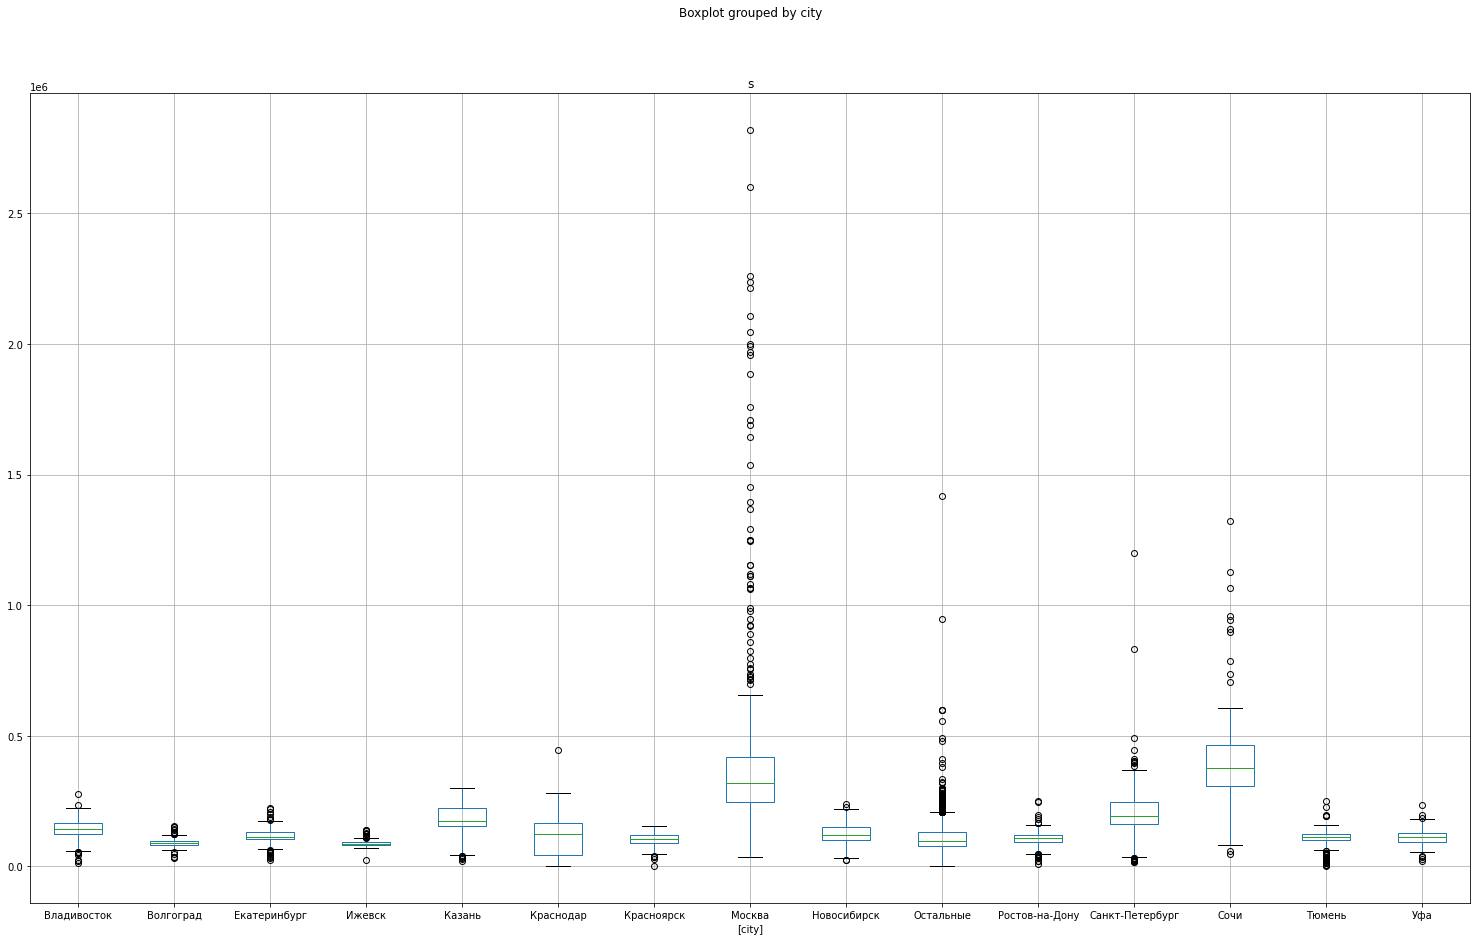

In [377]:
fig, ax  = plt.subplots()
ax.set_title('s')
df[~df.objPriceAVG.isnull()].boxplot(column = ['objPriceAVG'], by = ['city'], figsize = (25,15), ax = ax )
fig.set_size_inches(25,15)
ax.set_title('Средняя цена')
plt.show()

### вывод:
Надо было покупать хаты в Сочи<br>
Еще интересно, связаны ли высокие цены в Казани с выходом известного сериала в конце 2023

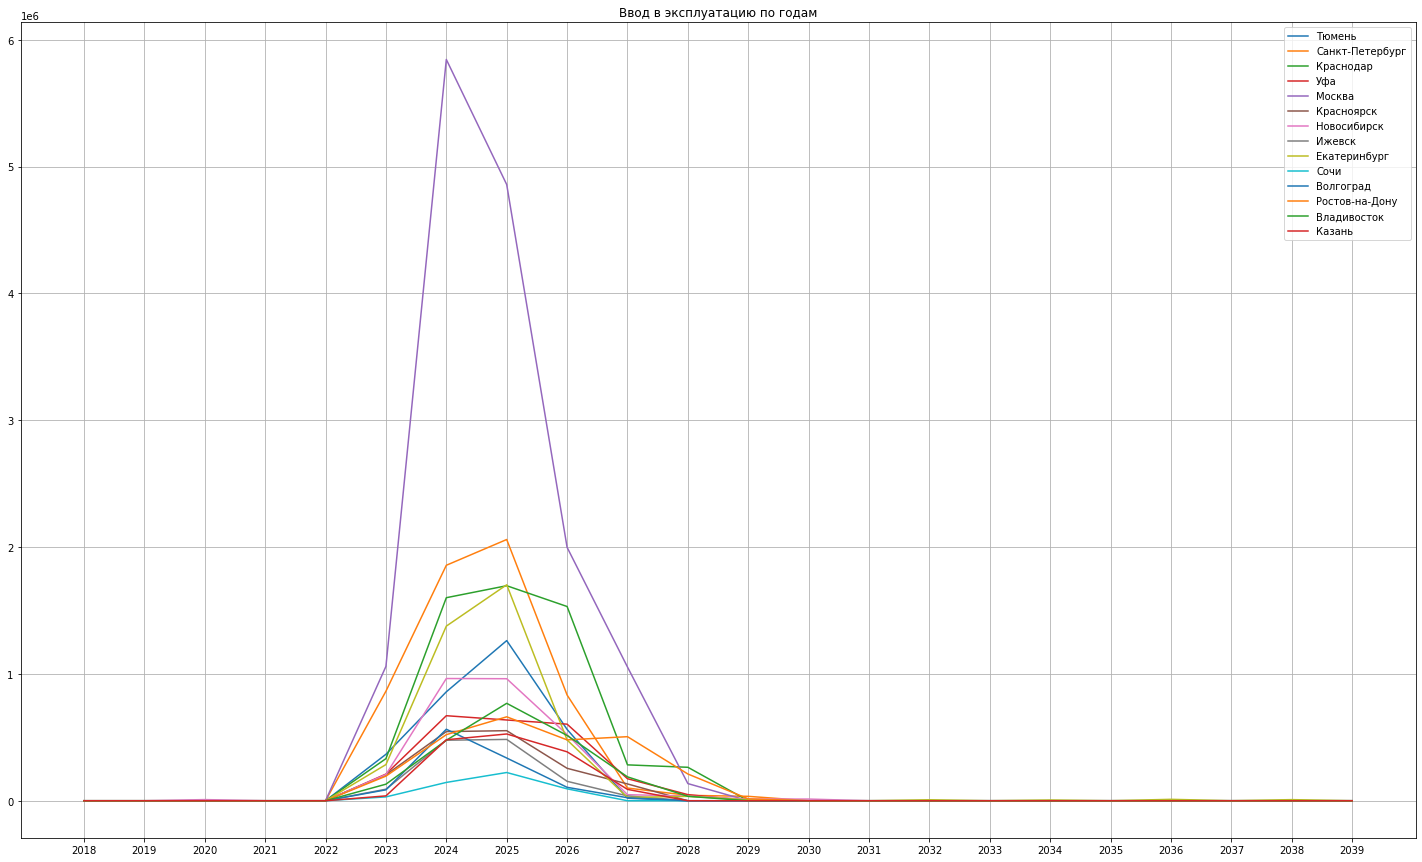

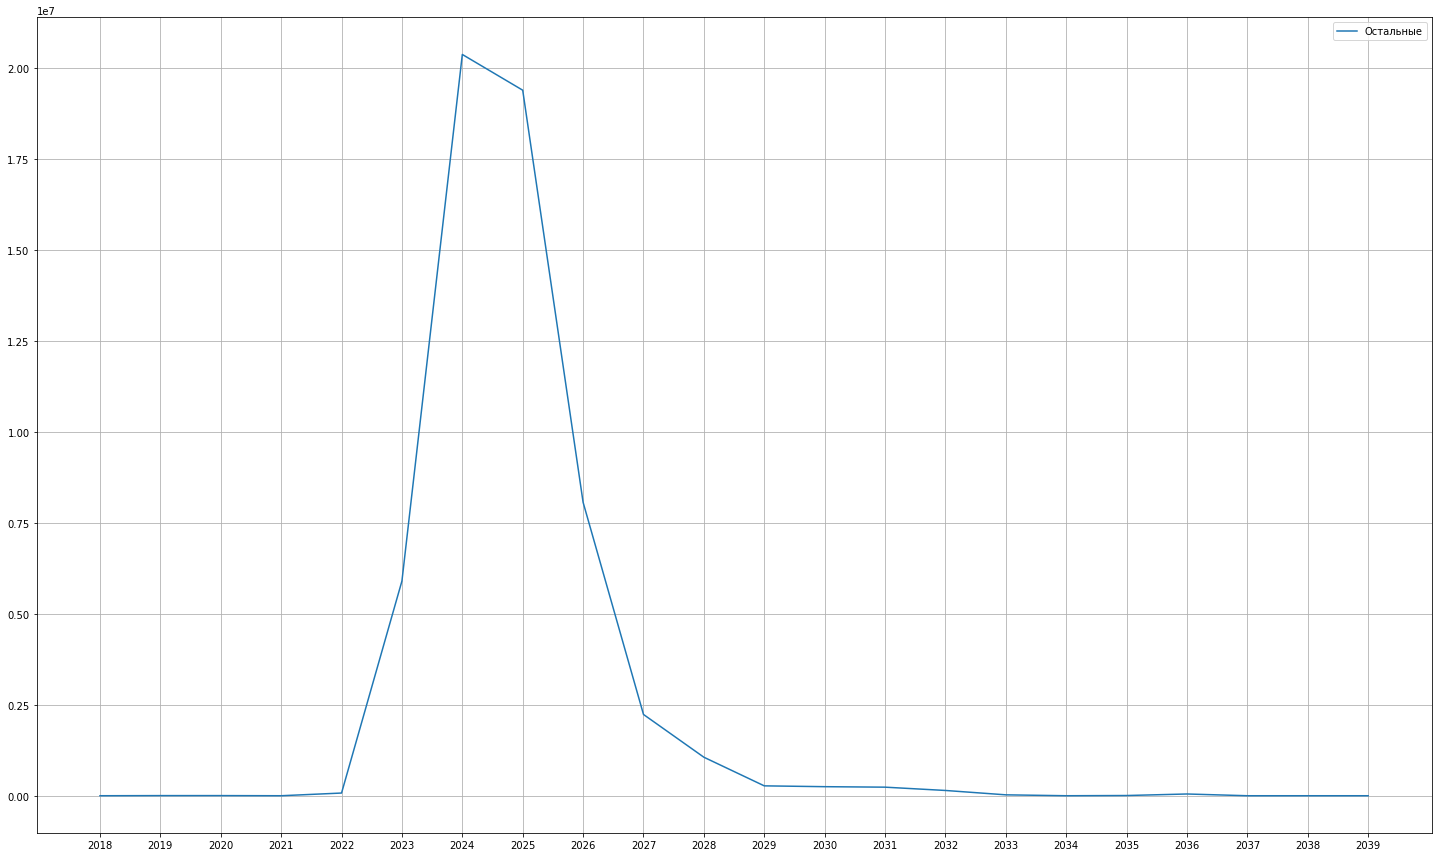

In [439]:
mask_years = []
for year in range(int(df.year_ready.min()), int(df.year_ready.max())+1):
    mask_years.append(str(year))
mask_years = pd.DataFrame(mask_years).rename(columns = {0:'year_ready'})
mask_years

fig,ax = plt.subplots()

for city in df.city.unique():
    if city == 'Остальные':
        continue
    df_city = df[df.city==city].groupby(by=['year_ready']).agg(objSquareLiving = ('objSquareLiving', 'sum')).merge(mask_years, on = 'year_ready', how = 'outer').fillna(0).sort_values(by=['year_ready']).reset_index()
    plt.plot(
        df_city['year_ready'],
        df_city['objSquareLiving'],
        label = city
        )

fig.set_size_inches(25,15)
plt.legend()
plt.grid()
plt.title('Ввод в эксплуатацию по годам')
plt.show()



fig,ax = plt.subplots()

df_city = df[df.city=='Остальные'].groupby(by=['year_ready']).agg(objSquareLiving = ('objSquareLiving', 'sum')).merge(mask_years, on = 'year_ready', how = 'outer').fillna(0).sort_values(by=['year_ready']).reset_index()
plt.plot(
    df_city['year_ready'],
    df_city['objSquareLiving'],
    label = 'Остальные'
    )

fig.set_size_inches(25,15)
plt.legend()
plt.grid()
plt.show()

<b> я бы не стал делать выводы на основании обьявлений на нашдом.рф о темпах строительства в целом<b>

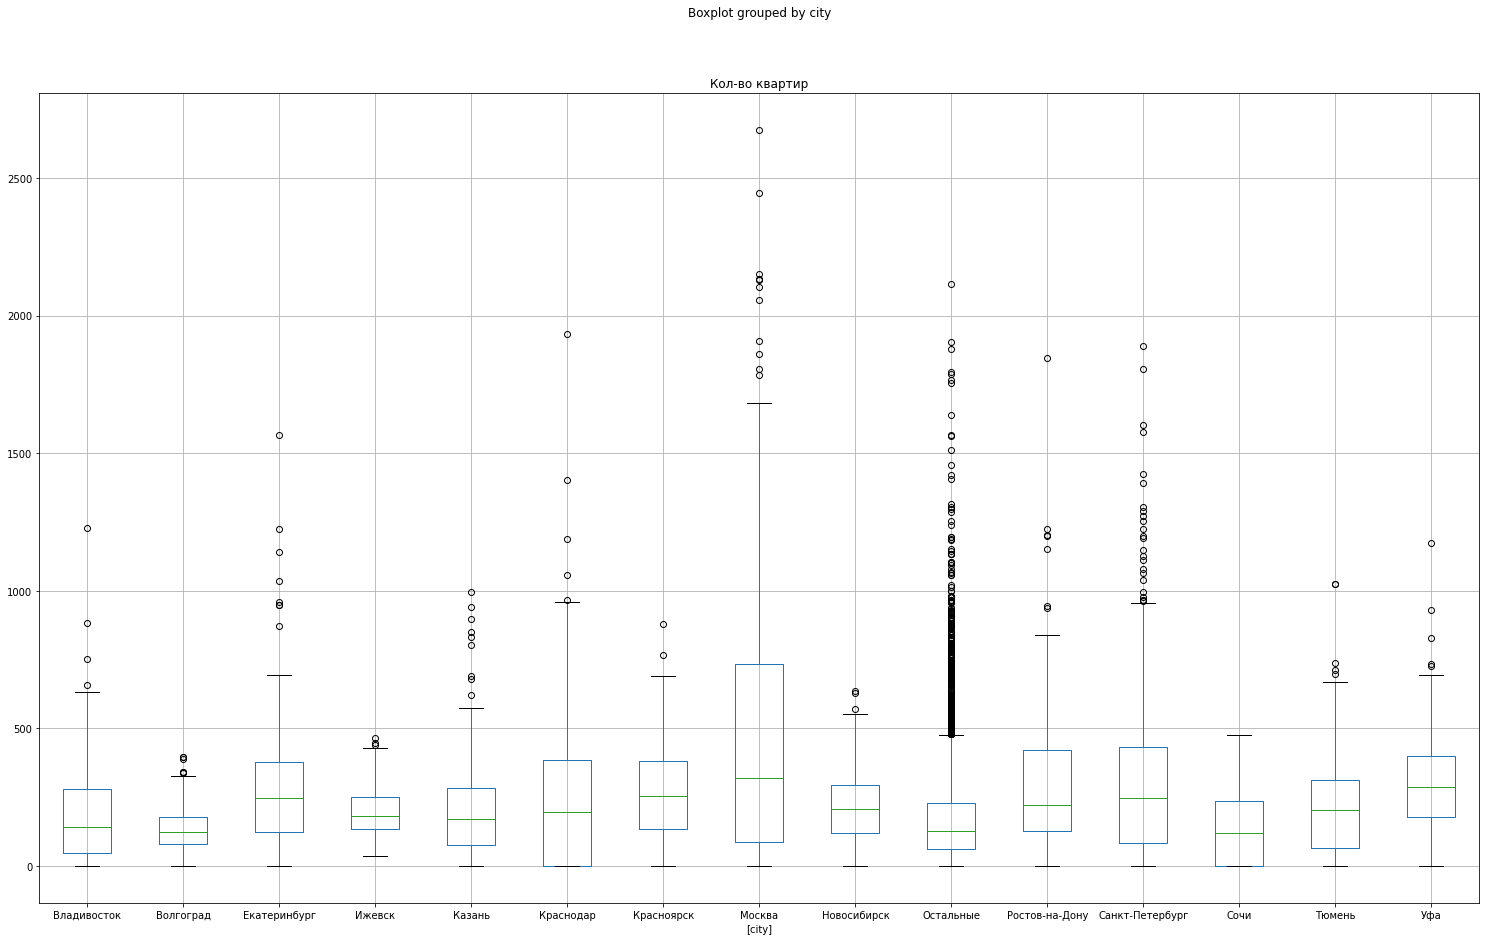

In [438]:
 fig, ax  = plt.subplots() 
df[~df.objPriceAVG.isnull()].boxplot(column = ['objElemLivingCnt'], by = ['city'], figsize = (25,15), ax = ax )
fig.set_size_inches(25,15)
ax.set_title('Кол-во квартир')
plt.show()

Вывод: человейники строят массово не только в Москве, но и в остальных городах, но в Москве это уже норма, в отличии от остальных городов, где человейник - это выброс

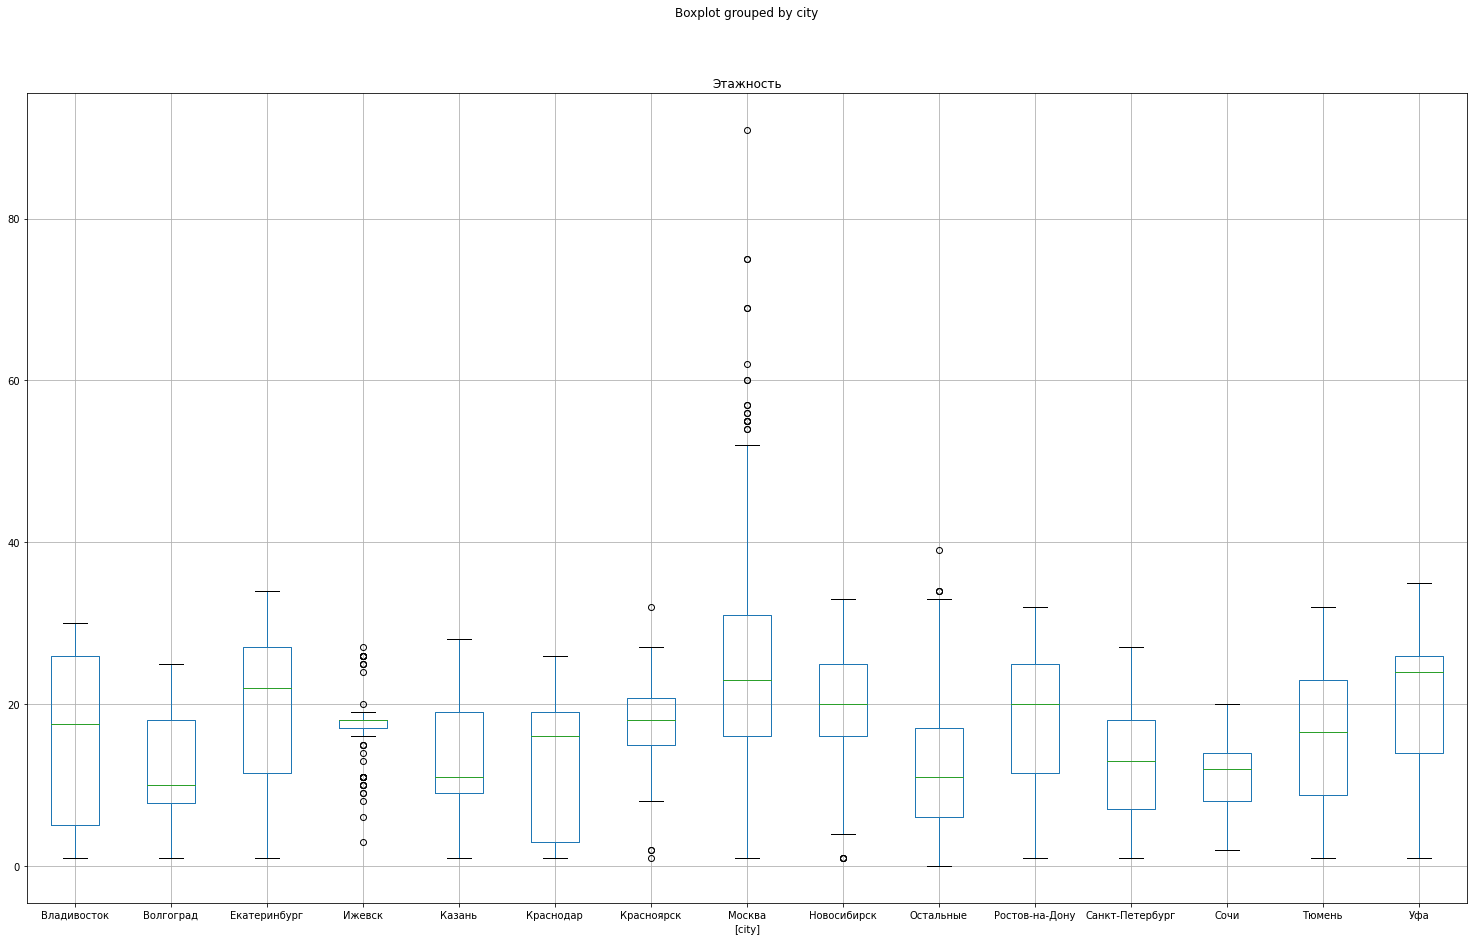

In [437]:
fig, ax  = plt.subplots() 
df[~df.objPriceAVG.isnull()].boxplot(column = ['objFloorMax'], by = ['city'], figsize = (25,15), ax = ax )
fig.set_size_inches(25,15)
ax.set_title('Этажность')
plt.show()

Вывод: выше 40 этажа можно жить только в Москве :)

### на всякий случай код

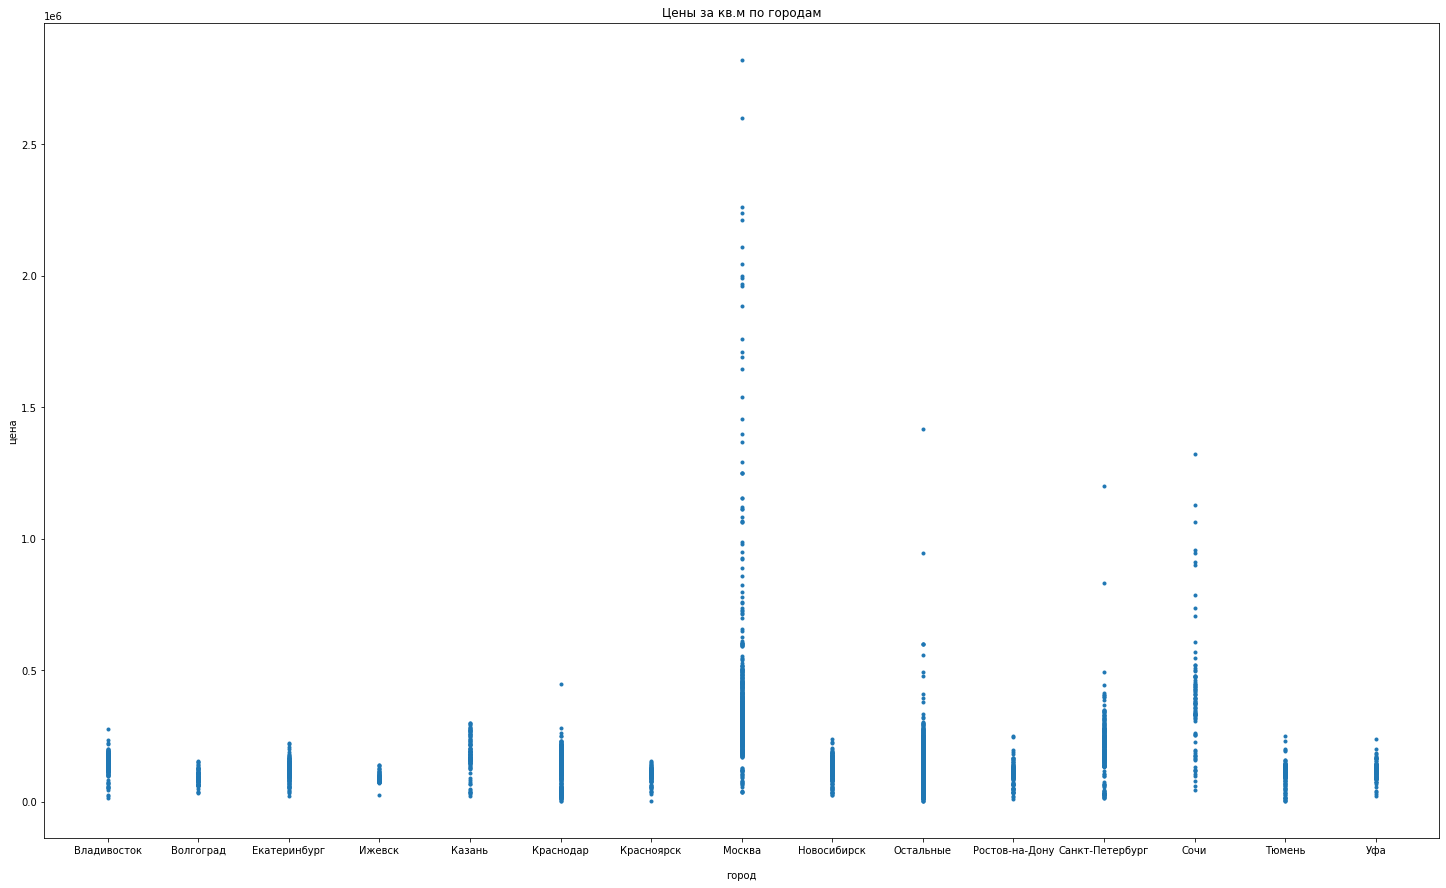

In [351]:
fig,ax = plt.subplots()

plt.scatter(df.city_index, df.objPriceAVG, marker = '.')
plt.xticks([x for x in range(0,15)], [dict_cities[x] for x in range(0,15)])
fig.set_size_inches(25,15) 
plt.title('Цены за кв.м по городам')
plt.xlabel('\nгород')
plt.ylabel('цена')
plt.show()